В данном практическом задании предлагается решить задачу бинарной классификации с помощью 2-х методов:


*   логистической регрессии;
*   метода k ближайших соседей.

В ходе решения разделите выборку на обучающую и проверочную.

Постройте распределение выборки по классам в виде графиков.

Для каждого классификатора расчитайте:
* долю верных ответов
* матрицу ошибок
* точность, полноту и F-меру

Постройте следующие графики:
* PR кривые для 2-х алгоритмов на одном графике;
* ROC кривые для 2-х алгоритмов на одном графике.

В легенде графиков отразите:
* Average Precision для PR кривой
* ROC-AUC для ROC кривой.

В конце сделайте выводы об предлагаемом алгоритме и порогах его работы.


Ниже сгенерирован набор данных для задачи бинарной классификации

In [83]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    weights = (0.15, 0.85),
    class_sep = 6.0,
    hypercube = False,
    random_state = 2,
)

**Разделим выборку на тестовую и обучающую, кроме того, установим параметр stratify в положении "y", чтобы в обеих выборках 
классы были распределены равномерно и имели одинаковые доли.(одинаковая доля каждого класса в обучающей и тестовой выборке)**

In [84]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=40,
                                                    stratify=y)

**Построим распределение классов в выборках**  


In [85]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [124 676]
Количество строк в y_test по классам: [ 31 169]


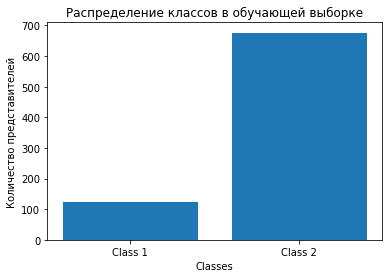

In [86]:
x = ['Class 1', 'Class 2']
y = np.bincount(y_train)
plt.bar(x,y)
plt.xlabel('Classes')
plt.ylabel("Количество представителей")
plt.title('Распределение классов в обучающей выборке')
plt.show()


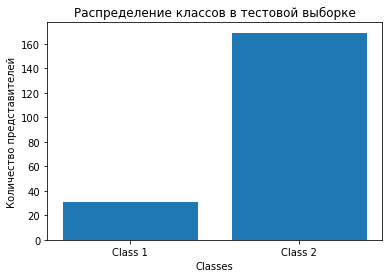

In [87]:
x = ['Class 1', 'Class 2']
y = np.bincount(y_test)
plt.bar(x,y)
plt.xlabel('Classes')
plt.ylabel("Количество представителей")
plt.title('Распределение классов в тестовой выборке')
plt.show()

**Построим kNN модель**  


**Перед этим стоит промасштабировать выборку, чтобы разные признаки вносили одинаковый вклад(особенно важно для линейных моделей)**  


In [88]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


Text(0, 0.5, 'Accuracy')

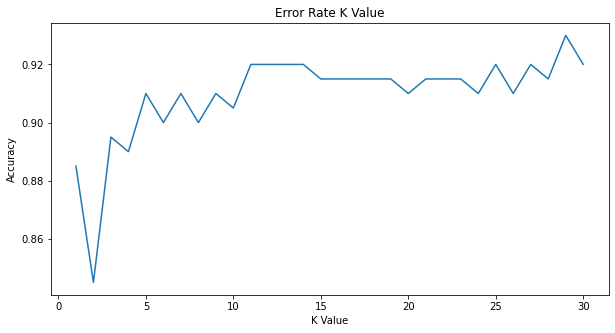

In [89]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
error_array = []
neighbors_number = np.arange(1,31,1)
print(neighbors_number)
for i in  neighbors_number:
    my_KNN = KNeighborsClassifier(n_neighbors=i)
    my_KNN.fit(X_train, y_train)
    y_pred = my_KNN.predict(X_test)
    #print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
    error_array.append( sklearn.metrics.accuracy_score(y_test,y_pred))
plt.figure(figsize=(10, 5)) 
plt.plot(neighbors_number, error_array) 
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Accuracy')


**Как видим, оптимальное число соседей составляет от 12 до примерно 13-14, в данном графике рассчитывалась Accuracy(отношение правильно угаданных к общему  числу. Данная метрика не эффективна, если представителей одного класса сильно больше чем другого/их.**  

**Сделаем для kNN матрицу ошибок, а также попросим sklearn сразу высчитать по ней Precision и Recall разных классов, и вывести все это в удобном для пользователя виде**    

**Сначала снова обучим нашу модель с числом соседей == 14**  

In [90]:
my_KNN = KNeighborsClassifier(n_neighbors=14)
my_KNN.fit(X_train, y_train)
y_pred = my_KNN.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 21  10]
 [  6 163]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.94      0.96      0.95       169

    accuracy                           0.92       200
   macro avg       0.86      0.82      0.84       200
weighted avg       0.92      0.92      0.92       200



**Стоит сделать пояснение касательно Precision и Recall**  

**Матрица ошибок представляет собой следущую матрицу  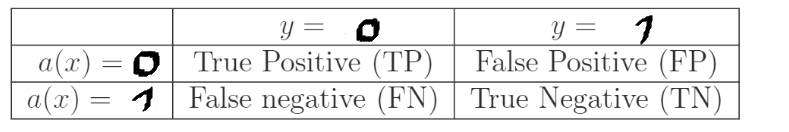  TP - кол-во угаданных объектов 0-го класса( объект принадлжети 0-му классу и модель определила его принадлежность к 0-му классу), FP - число объектов, которые модель отнесла к 0-му классу, но в реальности они принадлежат 1-му классу, FN - число объектов, которые модель отнесла к 1-му классу, а в реальности они относятся к 0-му, FP - число объектов которые модель отнесла к 1-му классу, которые в реальности также принадлежат первому классу.**  

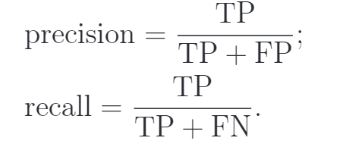
**Precision будет показывать какая доля объектов, определенных как "положительные"(0) действительно являются таковыми, полнота же для (0) будет показывать какая доля объектов (0) была найдена.  Эти показатели по отдельности могут ввести в заблуждение, допустим, что модель константная и везде выдает один ответ. Тогда для одного класса, RECALL будет максимален, при этом Precision будет весьма небольшим(и будет зависить от числа объектов в классах). Также и Precision может обманывать, к примеру, модель может выделить всего несколько объектов одного класса и все они в действительности будут объектами этого класса, но потом окажется, что объектов этого класса в десятки раз больше нежели "несколько штук", по итогу Precision будет близка к 1, в то время как RECALL будем стремится к 0.   Чтобы совместить информацию от Precision и Recall используется F-мера**  

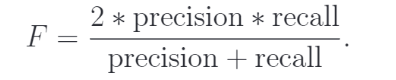

**Теперь построим модель на основе логистической регрессии**  

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs')
lr.fit(X_train,y_train)
y_pred_2=lr.predict(X_test)

In [92]:
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.92


In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', solver = 'sag')
lr.fit(X_train,y_train)
y_pred_2=lr.predict(X_test)

In [101]:
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.92


**Построим матрицу ошибок,Precision, Recall, F-меру**  

In [97]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[ 20  11]
 [  5 164]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.71        31
           1       0.94      0.97      0.95       169

    accuracy                           0.92       200
   macro avg       0.87      0.81      0.83       200
weighted avg       0.92      0.92      0.92       200



**С помощью ROC кривой можем измерить среднюю точность по ВСЕМ порогам**  

In [ ]:
**Координатные оси представляют собой**

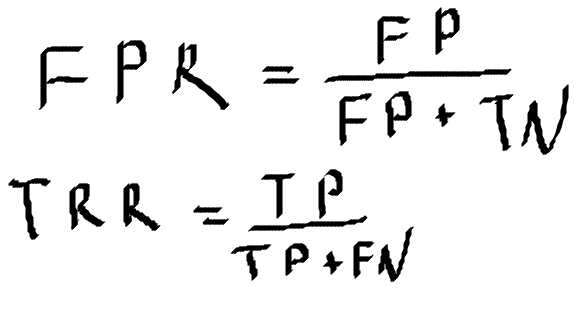

**Соответственно, если есть N резульатов работы моделей b1...bn, то ситуация будет такая:  
--порог-- FPR = 0, TPR = 0  
b1  
...  
bn**  
  
Сдвинем порог на один элемент  
b1 (если ответ модели и реальность совпадают, то TPR + 1, иначе FPR = FPR + 1)   
**--порог--**  
b2  
...  
bn  
  
Таким образом получим ступенчатую ROC кривую. площадь под кривой (AUC) будет численно равна средней точности модели по всем порогам.**   

Наихудший случай ROC-AUC кривой, когда площадь равняется 0.5, потому что модель по-сути будет угадывать значения с вероятностью 50/50 
иначе говоря, будет рандомной. 

In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, y_pred_2)
knn_auc = roc_auc_score(y_test,y_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
print('kNN: ROC AUC=%.3f' % (knn_auc))

LogisticRegression: ROC AUC=0.808
kNN: ROC AUC=0.821


In [106]:
fpr_knn, tpr_knn, treshold_knn = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)
fpr_lg, tpr_lg, treshold_lg = roc_curve(y_test, y_pred_2)
roc_auc_lg = auc(fpr_lg, tpr_lg)


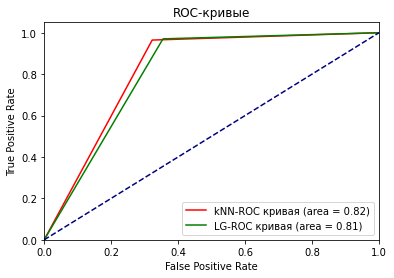

In [108]:
plt.plot(fpr_knn, tpr_knn, color='red',
         label='kNN-ROC кривая (area = %0.2f)' % roc_auc_knn, )
plt.plot(fpr_lg, tpr_lg, color='green',
         label='LG-ROC кривая (area = %0.2f)' % roc_auc_lg, )
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC-кривые')
plt.legend(loc="lower right")
plt.show()

**оптимальный порог выбирается в зависимости от задачи, но в общем случае он оптимален, когда разность TPR и FPR максимально.
То есть, TPR должно быть как можно больше, а FPR в этой точке как можно меньше.**  

In [120]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
pr_knn, rc_knn, treshold_knn = precision_recall_curve(y_test, y_pred)
PRroc_auc_knn = auc(rc_knn, pr_knn)
#print(PRroc_auc_knn)
pr_lg, rc_lg, treshold_lg = precision_recall_curve(y_test, y_pred_2)
PRroc_auc_lg = auc(rc_lg, pr_lg)

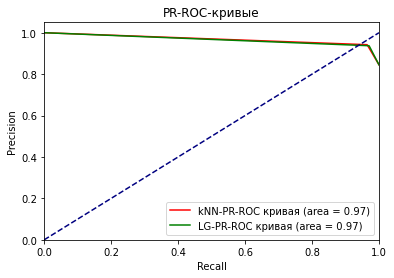

In [121]:
plt.plot(rc_knn, pr_knn, color='red',
         label='kNN-PR-ROC кривая (area = %0.2f)' % PRroc_auc_knn, )
plt.plot(rc_lg, pr_lg, color='green',
         label='LG-PR-ROC кривая (area = %0.2f)' % PRroc_auc_lg, )
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title( 'PR-ROC-кривые')
plt.legend(loc="lower right")
plt.show()

Вывод:
Сразу стоит отметить, что выбор порога зависит от конкретной задачи: в каких-то случаях нам не так важно покрытие всего класса(то есть TPR),
но важна точность и уверенность в том, что найденные объекты действительно принадлежат заданному классу. В каких то задачах, наоборот, большее
значение имеет полное покрытие какого-то класса, при этом ложные срабатывания модели и отнесение к нужному классу элементов из "ненужного" не является чем-то критичным.
В общим случае - оптимальный порог тот, при котором достигается наибольшее покрытие(де-факто TRP == RECALL), при этом число ложных срабатываний модели (отнесение "к положительным" элементам элементов "отрицательного" класса) минимально.
На приведенном ниже скриншоте, я указал такую точку. Если двигаться влево по кривой, то, несмотря на незначительное FPR, TPR будет убывать достаточно сильно, если двигаться вправо, то при незначительном росте TPR доля ложных классификаций FPR будет значительно возрастать.
В выбранное же точке, значение TPR ~ 1, при этом самый низкий FPR(характер графика описывался выше). Поэтому, данная точка будет являться оптимальной с точки зрения порога. Значение порога для получения TRP и FPR в этой точке будет опитмальным. 
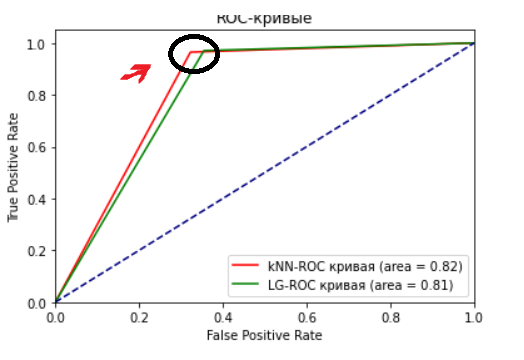

PR кривая позволяет более здраво оценить качество модели, в случае несбалансированности классов, к которому неустойчива ROC кривая.  
Например, если есть два класса 1 и 2. И модель имеет хороший показатель точности(0.9 например), при этом класс 1 имеет значительно меньше элементов, нежели 2-ой, то при классификации выборки может получится так, что модель будет иметь высокий TPR, при этом низки FPR, который получается как раз из-за огромной разности в размерах выборки.  
Чтобы решить эту проблему и получить более объективные данные используеют PR кривую. 
Исходя из построенной PR кривой можно заключить, что оптимальная точка будет находится так, как показано ниже. При движении влево по графику, очевидно, что взамен на небольшое возрастание точности(число верных классификаций из всех классификаций с данным ответом)  модели, охват объектов класса будет сильно уменьшаться(то есть число верно определенных объектов класса). Если двигаться вправо, то становится заметно, что при небольшом увеличении охвата, достаточно сильно снизится точность, то  есть модель будет классифицировать как данный класс элементы другого. Что не очень хорошо, особенно с учетом того, что данная выборка имеет сильно различающиеся по размеру классы.  
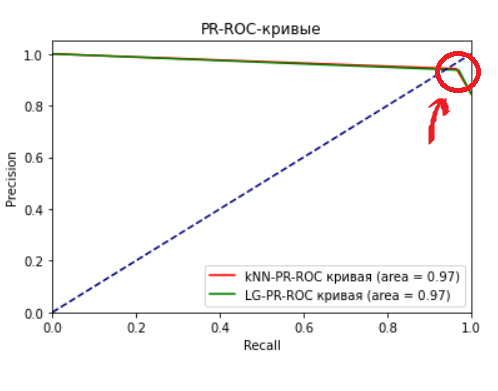